In [6]:
!pip install tenserflow

ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [1]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from pathlib import Path
from warnings import filterwarnings

from rdkit.Chem import Draw, PandasTools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer



### **Target search for Acetylcholinesterase**

In [3]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


We will assign the first entry (which corresponds to the target protein, Human Acetylcholinesterase) to the selected_target variable

In [163]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL220'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [4]:
df=pd.set_option('display.max_columns',45)

In [ ]:
df.to_csv('acetylcholinesterase_01_bioactivity_data_raw.csv', index=False)

In [100]:
df = pd.read_csv('acetylcholinesterase_01_bioactivity_data_raw.csv')

In [101]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8497,NaN,24510947,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,4.19
8498,NaN,24510948,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,230.00
8499,NaN,24510949,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,14.50
8500,NaN,24510950,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,8000.00


# Show None Columns

In [102]:
all_none_columns = []
for col in df.columns:
    if df[col].isnull().all():
        all_none_columns.append(col)

# Print the names of the columns that have all None values
print('Columns with all None values:', all_none_columns)

Columns with all None values: ['assay_variant_accession', 'assay_variant_mutation', 'standard_text_value', 'standard_upper_value', 'text_value', 'toid']


In [103]:
df.standard_upper_value

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8497   NaN
8498   NaN
8499   NaN
8500   NaN
8501   NaN
Name: standard_upper_value, Length: 8502, dtype: float64

In [104]:
df.standard_upper_value.unique()

array([nan])

In [105]:
df.target_chembl_id

0       CHEMBL220
1       CHEMBL220
2       CHEMBL220
3       CHEMBL220
4       CHEMBL220
          ...    
8497    CHEMBL220
8498    CHEMBL220
8499    CHEMBL220
8500    CHEMBL220
8501    CHEMBL220
Name: target_chembl_id, Length: 8502, dtype: object

In [106]:
df.target_chembl_id.unique()

array(['CHEMBL220'], dtype=object)

In [107]:
df.target_tax_id.unique()

array([9606], dtype=int64)

In [108]:
df.target_organism

0       Homo sapiens
1       Homo sapiens
2       Homo sapiens
3       Homo sapiens
4       Homo sapiens
            ...     
8497    Homo sapiens
8498    Homo sapiens
8499    Homo sapiens
8500    Homo sapiens
8501    Homo sapiens
Name: target_organism, Length: 8502, dtype: object

In [109]:
df.target_pref_name

0       Acetylcholinesterase
1       Acetylcholinesterase
2       Acetylcholinesterase
3       Acetylcholinesterase
4       Acetylcholinesterase
                ...         
8497    Acetylcholinesterase
8498    Acetylcholinesterase
8499    Acetylcholinesterase
8500    Acetylcholinesterase
8501    Acetylcholinesterase
Name: target_pref_name, Length: 8502, dtype: object

# Remove None Columns

In [110]:
df = df[df.standard_value.notna()]
df = df[df.canonical_smiles.notna()]
df = df[df.units.notna()]
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8497,NaN,24510947,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,4.19
8498,NaN,24510948,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,230.00
8499,NaN,24510949,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,14.50
8500,NaN,24510950,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,8000.00


In [111]:
#Remove duplicated values
df = df.drop_duplicates(['canonical_smiles'])
df 

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,NaN,24510944,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,184.00
8495,NaN,24510945,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,13.40
8496,NaN,24510946,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,19.20
8497,NaN,24510947,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,4.19


In [112]:
#Pourcentage des valeurs null
(df.isnull().sum()/df.shape[0])*100

activity_comment              98.931434
activity_id                    0.000000
activity_properties            0.000000
assay_chembl_id                0.000000
assay_description              0.000000
assay_type                     0.000000
assay_variant_accession      100.000000
assay_variant_mutation       100.000000
bao_endpoint                   0.000000
bao_format                     0.000000
bao_label                      0.000000
canonical_smiles               0.000000
data_validity_comment         90.917186
data_validity_description     90.917186
document_chembl_id             0.000000
document_journal               1.531612
document_year                  0.445236
ligand_efficiency             20.320570
molecule_chembl_id             0.000000
molecule_pref_name            95.405165
parent_molecule_chembl_id      0.000000
pchembl_value                 18.913624
potential_duplicate            0.000000
qudt_units                     0.142476
record_id                      0.000000


In [113]:
df.to_csv('acetylcholinesterase_02_bioactivity_data_raw.csv', index=False)

In [114]:
df2 = pd.read_csv('acetylcholinesterase_02_bioactivity_data_raw.csv')

In [115]:
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,NaN,24510944,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,184.00
5611,NaN,24510945,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,13.40
5612,NaN,24510946,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,19.20
5613,NaN,24510947,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,4.19


# Exploration

In [116]:
mols = [Chem.MolFromSmiles(smiles) for smiles in df2['canonical_smiles']]
df2['num_atoms'] = [Descriptors.HeavyAtomCount(mol) for mol in mols]
df2['num_rings'] = [Descriptors.RingCount(mol) for mol in mols]
df2['NumValenceElectron'] = [Descriptors.NumValenceElectrons(mol) for mol in mols]
df2['NumAliphaticCarbocycles '] = [Descriptors.NumAliphaticCarbocycles(mol) for mol in mols]
df2['NumSaturatedRings'] = [Descriptors.NumSaturatedRings(mol) for mol in mols]
df2['NumRotatableBonds'] = [Descriptors.NumRotatableBonds(mol) for mol in mols]
df2['NumHeteroatoms'] = [Descriptors.NumHeteroatoms(mol) for mol in mols]
df2['TPSA'] = [Descriptors.TPSA(mol) for mol in mols]




In [117]:
df_selected = df2[['molecule_chembl_id','canonical_smiles','standard_value','num_atoms','num_rings','NumHeteroatoms','num_atoms','num_rings','NumValenceElectron','NumAliphaticCarbocycles ','NumSaturatedRings','NumRotatableBonds',]]

In [118]:
df_selected

,molecule_chembl_id,canonical_smiles,standard_value,num_atoms,num_rings,NumHeteroatoms,num_atoms,num_rings,NumValenceElectron,NumAliphaticCarbocycles,NumSaturatedRings,NumRotatableBonds
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,23,3,6,23,3,118,0,0,6
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,25,4,7,25,4,132,1,2,4
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,28,3,10,28,3,146,0,0,4
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,26,3,10,26,3,140,0,1,3
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,23,2,10,23,2,124,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5610,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,184.00,33,4,5,33,4,174,1,0,11
5611,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,13.40,34,4,6,34,4,180,1,0,11
5612,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,19.20,30,4,3,30,4,158,1,0,10
5613,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,4.19,31,4,4,31,4,164,1,0,10


# Add Class for standard_value 

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [119]:
Class = []
for i in df_selected.standard_value:
  if float(i) >= 10000:
    Class.append("inactive")
  elif float(i) <= 1000:
    Class.append("active")
  else:
    Class.append("intermediate")

In [120]:
bioactivity_class = pd.Series(Class, name='Class')
df3= pd.concat([df_selected, bioactivity_class], axis=1, join='inner')
df3

,molecule_chembl_id,canonical_smiles,standard_value,num_atoms,num_rings,NumHeteroatoms,num_atoms,num_rings,NumValenceElectron,NumAliphaticCarbocycles,NumSaturatedRings,NumRotatableBonds,Class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,23,3,6,23,3,118,0,0,6,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,25,4,7,25,4,132,1,2,4,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,28,3,10,28,3,146,0,0,4,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,26,3,10,26,3,140,0,1,3,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,23,2,10,23,2,124,0,0,3,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,184.00,33,4,5,33,4,174,1,0,11,active
5611,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,13.40,34,4,6,34,4,180,1,0,11,active
5612,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,19.20,30,4,3,30,4,158,1,0,10,active
5613,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,4.19,31,4,4,31,4,164,1,0,10,active


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

all numbers are multiples of five, which is the origin of the rule's name

In [121]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [122]:
df_lipinski = lipinski(df3.canonical_smiles)

In [123]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5610,446.591,6.5126,3.0,4.0
5611,481.036,7.1660,3.0,4.0
5612,402.582,6.8144,2.0,3.0
5613,437.027,7.4678,2.0,3.0


In [124]:
df_combined = pd.concat([df3,df_lipinski], axis=1)

In [125]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,num_atoms,num_rings,NumHeteroatoms,num_atoms,num_rings,NumValenceElectron,NumAliphaticCarbocycles,NumSaturatedRings,NumRotatableBonds,Class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,23,3,6,23,3,118,0,0,6,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,25,4,7,25,4,132,1,2,4,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,28,3,10,28,3,146,0,0,4,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,26,3,10,26,3,140,0,1,3,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,23,2,10,23,2,124,0,0,3,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,184.00,33,4,5,33,4,174,1,0,11,active,446.591,6.5126,3.0,4.0
5611,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,13.40,34,4,6,34,4,180,1,0,11,active,481.036,7.1660,3.0,4.0
5612,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,19.20,30,4,3,30,4,158,1,0,10,active,402.582,6.8144,2.0,3.0
5613,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,4.19,31,4,4,31,4,164,1,0,10,active,437.027,7.4678,2.0,3.0


In [126]:
#list=['molecule_chembl_id','canonical_smiles','standard_value','MW','LogP','NumHDonors','NumHAcceptors','Class']

In [127]:
#df_columns = df_combined.reindex(columns=swap_list)

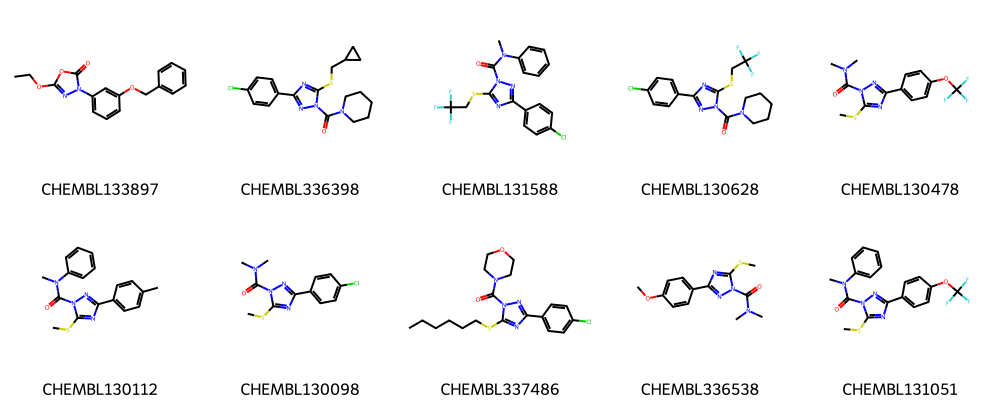

In [128]:
# Using PandasTools and the respective Draw method
PandasTools.AddMoleculeColumnToFrame(df_combined, smilesCol="canonical_smiles", molCol="Mol2D")
Draw.MolsToGridImage(list(df_combined.Mol2D[0:10]), legends=list(df_combined.molecule_chembl_id[0:20]), molsPerRow=5)

In [129]:
df6=df_combined

In [130]:
# Index of the longest SMILES string
longest_smiles = max(df6["canonical_smiles"], key=len)
longest_smiles_index = df6.canonical_smiles[df6.canonical_smiles == longest_smiles].index.tolist()
print(f"Longest SMILES: {longest_smiles}")
print(f"Contains {len(longest_smiles)} characters, index in dataframe: {longest_smiles_index[0]}.")
smiles_maxlen = len(longest_smiles)
# NBVAL_CHECK_OUTPUT

Longest SMILES: C[C@@]12CC[C@@H]3[C@]4(CC[C@H]5[C@@]3(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]3(C)CCC[C@@]5(C)[C@@H]6CC[C@@]7(C)C[C@]6(CC[C@@H]53)C[C@H]7OC(=O)CCCCCCCCC(=O)O[C@@H]1C4)C2.[Br-].[Br-]
Contains 204 characters, index in dataframe: 2673.


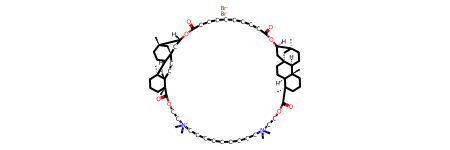

In [131]:
# Draw the molecules with the longest SMILES
longest_smiles_mol = Chem.MolFromSmiles(longest_smiles)
longest_smiles_mol

In [132]:
# Index of the shortest SMILES string
shortest_smiles = min(df6["canonical_smiles"], key=len)
shortest_smiles_index = df6.canonical_smiles[df6.canonical_smiles == shortest_smiles].index.tolist()
print(f"Shortest SMILES: {shortest_smiles}")
print(
    f"Contains {len(shortest_smiles)} characters, index in dataframe: {shortest_smiles_index[0]}."
)
# NBVAL_CHECK_OUTPUT

Shortest SMILES: NC(=O)O
Contains 7 characters, index in dataframe: 520.


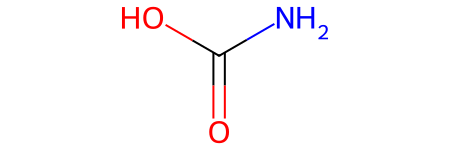

In [133]:
# Draw the molecules with the shortest SMILES
shortest_smiles_mol = Chem.MolFromSmiles(shortest_smiles)
shortest_smiles_mol

 it is common to use standardized values to represent the potency of a molecule. This is done to allow for comparison of molecules with different scales of activity and to facilitate the development of predictive models.

One common way to standardize the potency of a molecule is to use the pIC50 value, which is defined as the negative logarithm (base 10) of the IC50 value (the concentration of a compound that inhibits 50% of a biological activity). The pIC50 value is a commonly used measure of the potency of a compound, as it allows for comparison of compounds with different potencies on the same scale.

In [134]:
df6.to_csv('acetylcholinesterase_03_bioactivity_data_raw.csv', index=False)

In [135]:
df6 = pd.read_csv('acetylcholinesterase_03_bioactivity_data_raw.csv')

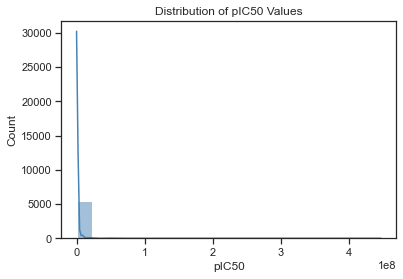

In [59]:
# Visualize the distribution of pIC50 values
sns.histplot(df7['pIC50'], kde=True, bins=20, color='steelblue')
plt.xlabel('pIC50')
plt.ylabel('Count')
plt.title('Distribution of pIC50 Values')
plt.show()

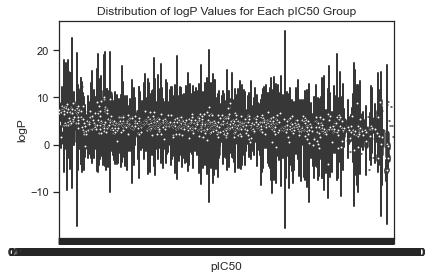

In [60]:
# Create a violin plot of the logP values for each pIC50 group
sns.violinplot(data=df7, x='pIC50', y='LogP', palette='coolwarm')
plt.xlabel('pIC50')
plt.ylabel('logP')
plt.title('Distribution of logP Values for Each pIC50 Group')
plt.show()

We can observe from this plot that there is a trend of increasing LogP values for molecules with lower pIC50 values (i.e., higher potency). This trend suggests that more potent molecules tend to have higher hydrophobicity. However, we can also see that there is a lot of variation in LogP values within each pIC50 group, indicating that hydrophobicity alone is not a sufficient predictor of potency.

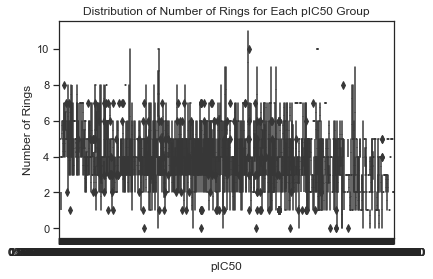

In [61]:
# Create a box plot of the number of rings for each pIC50 group
sns.boxplot(data=df7, x='pIC50', y='num_rings', palette='coolwarm')
plt.xlabel('pIC50')
plt.ylabel('Number of Rings')
plt.title('Distribution of Number of Rings for Each pIC50 Group')
plt.show()


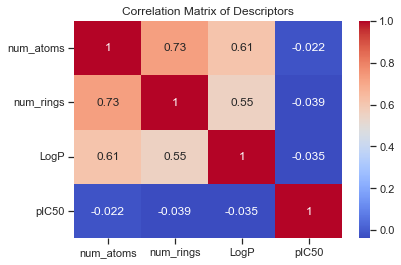

In [62]:
# Create a correlation matrix of the descriptors
corr = df7[['num_atoms', 'num_rings', 'LogP', 'pIC50']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Descriptors')
plt.show()

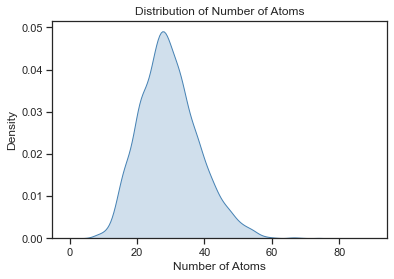

In [63]:
# Visualize the distribution of the number of atoms
sns.kdeplot(df7['num_atoms'], shade=True, color='steelblue')
plt.xlabel('Number of Atoms')
plt.ylabel('Density')
plt.title('Distribution of Number of Atoms')
plt.show()


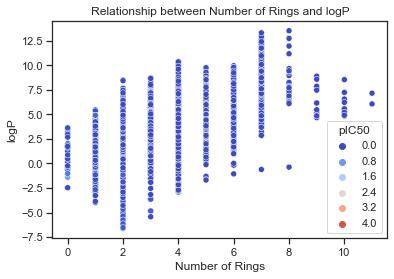

In [64]:
# Create a scatter plot of the logP values vs. the number of rings
sns.scatterplot(data=df7, x='num_rings', y='LogP', hue='pIC50', palette='coolwarm')
plt.xlabel('Number of Rings')
plt.ylabel('logP')
plt.title('Relationship between Number of Rings and logP')
plt.show()

# Outliers 

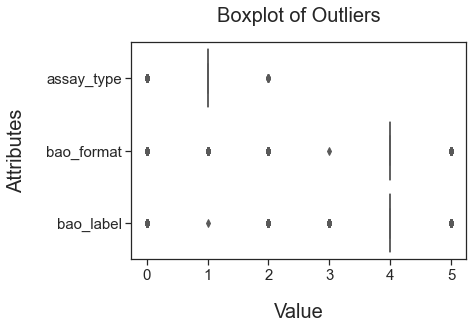

In [68]:
column=[
 
     'assay_type',
       'bao_format', 'bao_label',
       ]
ax = sns.boxplot(data = dfEnco[column], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of Outliers", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

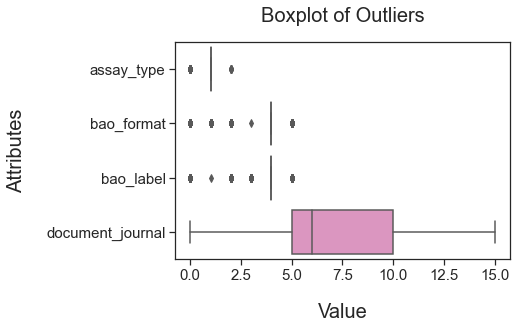

In [69]:
column=[ 'assay_type',
       'bao_format', 'bao_label' ,'document_journal' ]
ax = sns.boxplot(data = dfEnco[column], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of Outliers", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

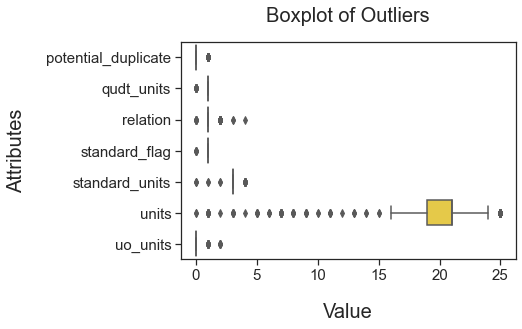

In [70]:
column=['potential_duplicate',
       'qudt_units', 'relation',  'standard_flag',
        'standard_units','units', 'uo_units']
ax = sns.boxplot(data = dfEnco[column], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of Outliers", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

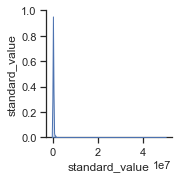

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Select the relevant columns for EDA
cols = ['standard_value']
# Plot pairwise scatterplots for the relevant columns
sns.pairplot(dfEnco[cols], diag_kind='kde')
plt.show()
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data, threshold=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    return ((data < Q1 - threshold*IQR) | (data > Q3 + threshold*IQR))

# Apply the detect_outliers_iqr function to the relevant columns in the DataFrame
outlier_cols =  ['standard_value']
outliers = dfEnco[outlier_cols][detect_outliers_iqr(dfEnco[outlier_cols])]

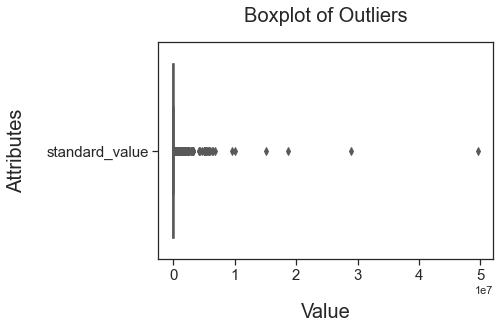

In [72]:
column=['standard_value']
ax = sns.boxplot(data = dfEnco[column], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of Outliers", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

<AxesSubplot:xlabel='standard_value'>

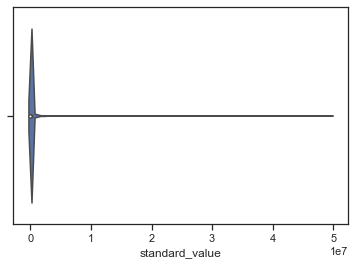

In [73]:
sns.violinplot(x=df['standard_value'])

In [157]:
df8['standard_value']

0         750.0
1         100.0
2       50000.0
3         300.0
4         800.0
         ...   
4429     2440.0
4430     2540.0
4431     3810.0
4432     3460.0
4433     2780.0
Name: standard_value, Length: 4434, dtype: float64

Text(0, 0.5, 'Frequency')

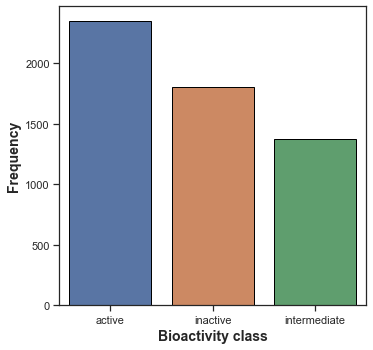

In [156]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='Class', data=df8, edgecolor='black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


Text(0, 0.5, 'pIC50 value')

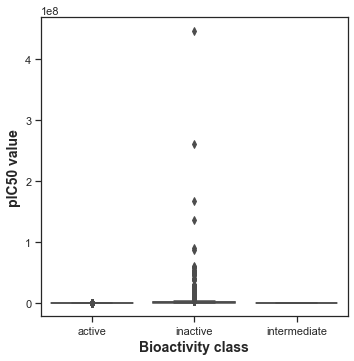

In [77]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Class', y = 'pIC50', data = df8)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')


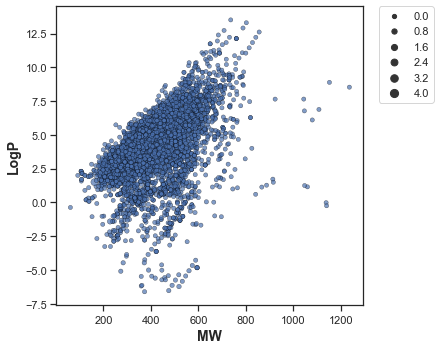

In [78]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df8, size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Text(0, 0.5, 'MW')

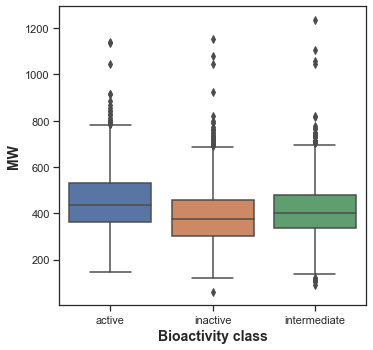

In [79]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Class', y = 'MW', data = df8)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

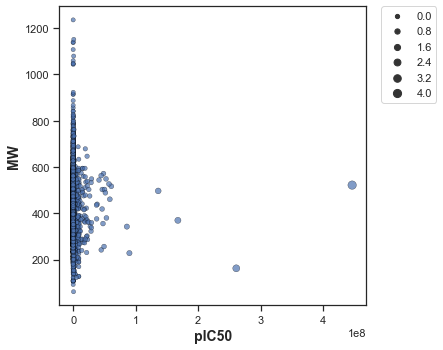

In [80]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='pIC50', y='MW', data=df8, size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('pIC50', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Text(0, 0.5, 'NumHDonors')

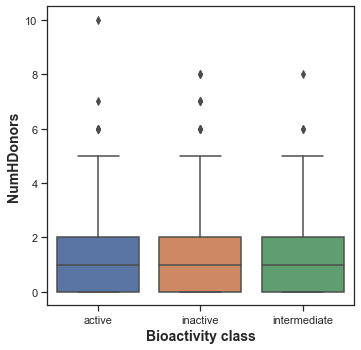

In [81]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Class', y = 'NumHDonors', data = df8)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

In [48]:
df_no_smiles = df6.drop(columns='canonical_smiles')

In [49]:
smiles = []

for i in df6.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [50]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,num_atoms,num_rings,NumHeteroatoms,num_atoms.1,num_rings.1,NumValenceElectron,NumAliphaticCarbocycles,NumSaturatedRings,NumRotatableBonds,Class,MW,LogP,NumHDonors,NumHAcceptors,Mol2D,canonical_smiles
0,CHEMBL133897,750.00,23,3,6,23,3,118,0,0,6,active,312.325,2.8032,0.0,6.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.00,25,4,7,25,4,132,1,2,4,active,376.913,4.5546,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.00,28,3,10,28,3,146,0,0,4,inactive,426.851,5.3574,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.00,26,3,10,26,3,140,0,1,3,active,404.845,4.7069,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.00,23,2,10,23,2,124,0,0,3,active,346.334,3.0953,0.0,6.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,CHEMBL5087646,184.00,33,4,5,33,4,174,1,0,11,active,446.591,6.5126,3.0,4.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2
5611,CHEMBL5078914,13.40,34,4,6,34,4,180,1,0,11,active,481.036,7.1660,3.0,4.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...
5612,CHEMBL5073819,19.20,30,4,3,30,4,158,1,0,10,active,402.582,6.8144,2.0,3.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1
5613,CHEMBL5072428,4.19,31,4,4,31,4,164,1,0,10,active,437.027,7.4678,2.0,3.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1


In [51]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [52]:
-np.log10( (10**-9)* 100000000 )

1.0

In [53]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [54]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [55]:
df_norm = norm_value(df_clean_smiles)
df_norm

C:\Users\houss\AppData\Local\Temp/ipykernel_1884/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


,molecule_chembl_id,num_atoms,num_rings,NumHeteroatoms,num_atoms.1,num_rings.1,NumValenceElectron,NumAliphaticCarbocycles,NumSaturatedRings,NumRotatableBonds,Class,MW,LogP,NumHDonors,NumHAcceptors,Mol2D,canonical_smiles,standard_value_norm
0,CHEMBL133897,23,3,6,23,3,118,0,0,6,active,312.325,2.8032,0.0,6.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00
1,CHEMBL336398,25,4,7,25,4,132,1,2,4,active,376.913,4.5546,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00
2,CHEMBL131588,28,3,10,28,3,146,0,0,4,inactive,426.851,5.3574,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00
3,CHEMBL130628,26,3,10,26,3,140,0,1,3,active,404.845,4.7069,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00
4,CHEMBL130478,23,2,10,23,2,124,0,0,3,active,346.334,3.0953,0.0,6.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,CHEMBL5087646,33,4,5,33,4,174,1,0,11,active,446.591,6.5126,3.0,4.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,184.00
5611,CHEMBL5078914,34,4,6,34,4,180,1,0,11,active,481.036,7.1660,3.0,4.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,13.40
5612,CHEMBL5073819,30,4,3,30,4,158,1,0,10,active,402.582,6.8144,2.0,3.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,19.20
5613,CHEMBL5072428,31,4,4,31,4,164,1,0,10,active,437.027,7.4678,2.0,3.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,4.19


In [56]:
df_final = pIC50(df_norm)
df_final

C:\Users\houss\AppData\Local\Temp/ipykernel_1884/3764191868.py:6: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
C:\Users\houss\AppData\Local\Temp/ipykernel_1884/3764191868.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,num_atoms,num_rings,NumHeteroatoms,num_atoms.1,num_rings.1,NumValenceElectron,NumAliphaticCarbocycles,NumSaturatedRings,NumRotatableBonds,Class,MW,LogP,NumHDonors,NumHAcceptors,Mol2D,canonical_smiles,pIC50
0,CHEMBL133897,23,3,6,23,3,118,0,0,6,active,312.325,2.8032,0.0,6.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,6.124939
1,CHEMBL336398,25,4,7,25,4,132,1,2,4,active,376.913,4.5546,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,7.000000
2,CHEMBL131588,28,3,10,28,3,146,0,0,4,inactive,426.851,5.3574,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,4.301030
3,CHEMBL130628,26,3,10,26,3,140,0,1,3,active,404.845,4.7069,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,6.522879
4,CHEMBL130478,23,2,10,23,2,124,0,0,3,active,346.334,3.0953,0.0,6.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,CHEMBL5087646,33,4,5,33,4,174,1,0,11,active,446.591,6.5126,3.0,4.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,6.735182
5611,CHEMBL5078914,34,4,6,34,4,180,1,0,11,active,481.036,7.1660,3.0,4.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,7.872895
5612,CHEMBL5073819,30,4,3,30,4,158,1,0,10,active,402.582,6.8144,2.0,3.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,7.716699
5613,CHEMBL5072428,31,4,4,31,4,164,1,0,10,active,437.027,7.4678,2.0,3.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,8.377786


In [57]:
df_final.pIC50.describe()

count    5615.000000
mean             inf
std              NaN
min         1.304518
25%         4.773402
50%         5.634512
75%         6.829738
max              inf
Name: pIC50, dtype: float64

In [58]:
df_final=df_final[df_final['pIC50']<11.2]
df_final

,molecule_chembl_id,num_atoms,num_rings,NumHeteroatoms,num_atoms.1,num_rings.1,NumValenceElectron,NumAliphaticCarbocycles,NumSaturatedRings,NumRotatableBonds,Class,MW,LogP,NumHDonors,NumHAcceptors,Mol2D,canonical_smiles,pIC50
0,CHEMBL133897,23,3,6,23,3,118,0,0,6,active,312.325,2.8032,0.0,6.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,6.124939
1,CHEMBL336398,25,4,7,25,4,132,1,2,4,active,376.913,4.5546,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,7.000000
2,CHEMBL131588,28,3,10,28,3,146,0,0,4,inactive,426.851,5.3574,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,4.301030
3,CHEMBL130628,26,3,10,26,3,140,0,1,3,active,404.845,4.7069,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,6.522879
4,CHEMBL130478,23,2,10,23,2,124,0,0,3,active,346.334,3.0953,0.0,6.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,CHEMBL5087646,33,4,5,33,4,174,1,0,11,active,446.591,6.5126,3.0,4.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,6.735182
5611,CHEMBL5078914,34,4,6,34,4,180,1,0,11,active,481.036,7.1660,3.0,4.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,7.872895
5612,CHEMBL5073819,30,4,3,30,4,158,1,0,10,active,402.582,6.8144,2.0,3.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,7.716699
5613,CHEMBL5072428,31,4,4,31,4,164,1,0,10,active,437.027,7.4678,2.0,3.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,8.377786


In [59]:
df_final = df_final.reset_index(drop=True)
df_final

,molecule_chembl_id,num_atoms,num_rings,NumHeteroatoms,num_atoms.1,num_rings.1,NumValenceElectron,NumAliphaticCarbocycles,NumSaturatedRings,NumRotatableBonds,Class,MW,LogP,NumHDonors,NumHAcceptors,Mol2D,canonical_smiles,pIC50
0,CHEMBL133897,23,3,6,23,3,118,0,0,6,active,312.325,2.8032,0.0,6.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,6.124939
1,CHEMBL336398,25,4,7,25,4,132,1,2,4,active,376.913,4.5546,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,7.000000
2,CHEMBL131588,28,3,10,28,3,146,0,0,4,inactive,426.851,5.3574,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,4.301030
3,CHEMBL130628,26,3,10,26,3,140,0,1,3,active,404.845,4.7069,0.0,5.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,6.522879
4,CHEMBL130478,23,2,10,23,2,124,0,0,3,active,346.334,3.0953,0.0,6.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,CHEMBL5087646,33,4,5,33,4,174,1,0,11,active,446.591,6.5126,3.0,4.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,6.735182
5592,CHEMBL5078914,34,4,6,34,4,180,1,0,11,active,481.036,7.1660,3.0,4.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,7.872895
5593,CHEMBL5073819,30,4,3,30,4,158,1,0,10,active,402.582,6.8144,2.0,3.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,7.716699
5594,CHEMBL5072428,31,4,4,31,4,164,1,0,10,active,437.027,7.4678,2.0,3.0,<rdkit.Chem.rdchem.Mol object at 0x0000023A007...,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,8.377786


In [60]:
df_final.to_csv('acetylcholinesterase_10_bioactivity_data_raw.csv', index=False)

In [61]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_final[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [62]:
df_selection

,canonical_smiles,molecule_chembl_id
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478
...,...,...
5591,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,CHEMBL5087646
5592,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,CHEMBL5078914
5593,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,CHEMBL5073819
5594,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,CHEMBL5072428


In [63]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


## **Download PaDEL-Descriptor**

In [172]:
!C:/wget/wget.exe https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
!C:/wget/wget.exe https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-04-20 14:59:35--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-04-20 14:59:36--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: 'padel.zip.1'

     0K .......... .......... .......... .......... ..........  0%  158K 2m39s
    50K .......... .......... .......... .......... ..........  0%  143K 2m47s
   100K .......... .......... ..

--2023-04-20 15:09:44--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.sh [following]
--2023-04-20 15:09:45--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231 [text/plain]
Saving to: 'padel.sh'

     0K                                                       100% 3.33M=0s

2023-04-20 15:09:45 (3.33 MB/s) - 'padel.sh' saved [231/231]



In [173]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/     
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  


## **Calculate fingerprint descriptors**


In [64]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [65]:
! bash padel.sh

Processing CHEMBL133897 in molecule.smi (1/5596). 
Processing CHEMBL336398 in molecule.smi (2/5596). 
Processing CHEMBL131588 in molecule.smi (3/5596). 
Processing CHEMBL130628 in molecule.smi (4/5596). 
Processing CHEMBL130478 in molecule.smi (5/5596). 
Processing CHEMBL130112 in molecule.smi (6/5596). 
Processing CHEMBL130098 in molecule.smi (7/5596). 
Processing CHEMBL337486 in molecule.smi (8/5596). 
Processing CHEMBL336538 in molecule.smi (9/5596). Average speed: 3.47 s/mol.
Processing CHEMBL131051 in molecule.smi (10/5596). Average speed: 3.66 s/mol.
Processing CHEMBL341437 in molecule.smi (11/5596). Average speed: 1.23 s/mol.
Processing CHEMBL335033 in molecule.smi (12/5596). Average speed: 1.27 s/mol.
Processing CHEMBL122983 in molecule.smi (13/5596). Average speed: 0.98 s/mol.
Processing CHEMBL338720 in molecule.smi (14/5596). Average speed: 0.79 s/mol.
Processing CHEMBL339995 in molecule.smi (15/5596). Average speed: 0.66 s/mol.
Processing CHEMBL335158 in molecule.smi (16/559

## **Preparing the X and Y Data Matrices**

In [67]:
df_x = pd.read_csv('descriptors_output.csv')

In [68]:
df_x

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL130098,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL337486,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,AUTOGEN_molecule_2241,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2237,CHEMBL2011491,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2238,CHEMBL3216557,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2239,CHEMBL3216556,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df_x = df_x.drop(columns=['Name'])
df_x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2237,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2238,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2239,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_class=df_final['Class']

In [71]:
df_y = df_final['pIC50']
df_y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
5591    6.735182
5592    7.872895
5593    7.716699
5594    8.377786
5595    8.000000
Name: pIC50, Length: 5596, dtype: float64

In [72]:
dataset = pd.concat([df_x,df_y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.124939
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.735182
5592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.872895
5593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.716699
5594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.377786


In [73]:
dataset2 = pd.concat([dataset,df_class], axis=1)

In [74]:
dataset2

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50,Class
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.124939,active
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,active
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030,inactive
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879,active
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.096910,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.735182,active
5592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.872895,active
5593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.716699,active
5594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.377786,active


In [75]:
df_2class = dataset2[dataset2['Class'] != 'intermediate']
df_2class

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50,Class
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.124939,active
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,active
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030,inactive
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879,active
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.096910,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.735182,active
5592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.872895,active
5593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.716699,active
5594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.377786,active


In [76]:
df8=df_2class

In [77]:
Y_p=df_2class['pIC50']
Y_p

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
5591    6.735182
5592    7.872895
5593    7.716699
5594    8.377786
5595    8.000000
Name: pIC50, Length: 4209, dtype: float64

In [78]:
Y_c = df_2class['Class']
Y_c

0         active
1         active
2       inactive
3         active
4         active
          ...   
5591      active
5592      active
5593      active
5594      active
5595      active
Name: Class, Length: 4209, dtype: object

In [79]:
X = df_2class.drop(columns=['pIC50','Class'])
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ### **3.4. Remove low variance features**

In [80]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP143,...,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824,PubchemFP860
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
X.to_csv('descriptor_list.csv', index = False)

In [82]:
X.to_csv('descriptor_list2.csv', index = False)

## **4. Data split (80/20 ratio)**

In [83]:
from sklearn.model_selection import train_test_split


In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_p, test_size=0.2, random_state=42)

In [85]:
X_train.shape

(3367, 208)

In [86]:
Y_train.shape

(3367,)

In [87]:
X_test.shape

(842, 208)

In [88]:
X_test

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP143,...,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824,PubchemFP860
1353,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
171,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
5264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1152,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
Y_test.shape

(842,)

## **Modeling** Regression

In [96]:
from lightgbm import LGBMRegressor

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet, Lars, BayesianRidge, SGDRegressor, PassiveAggressiveRegressor, RANSACRegressor, HuberRegressor, OrthogonalMatchingPursuit, ARDRegression, TheilSenRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSCanonical, PLSRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import GammaRegressor, PoissonRegressor, TweedieRegressor


In [99]:
DTRmodel = DecisionTreeRegressor()
DTRmodel.fit(X_train, Y_train)
sc = DTRmodel.score(X_test, Y_test)
sc

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [425]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.36558209378389095

In [95]:
BRmodel = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)
BRmodel.fit(X_train, Y_train)
sc = BRmodel.score(X_train, Y_train)
sc

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [427]:
Y_pred = BRmodel.predict(X)
Y_pred

array([6.0418203 , 6.76398398, 5.04353852, ..., 7.68058937, 7.96889173,
       7.9503794 ])

In [428]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_p, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_p, Y_pred))

Mean squared error (MSE): 0.75
Coefficient of determination (R^2): 0.74


Text(0.5, 0, 'Experimental pIC50')

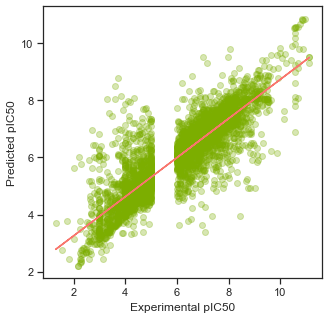

In [430]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y_p, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_p, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y_p,p(Y_p),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [431]:
import pickle

In [432]:
pickle.dump(BRmodel, open('acetylcholinesterase_model1.pkl', 'wb'))

## **Modeling** classification 

In [433]:
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP180,PubchemFP181,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP193,...,PubchemFP699,PubchemFP700,PubchemFP701,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP705,PubchemFP712,PubchemFP714,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,1,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0
5592,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0
5593,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0
5594,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [434]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_c, test_size=0.2, random_state=42)

In [435]:
from sklearn import svm, tree, naive_bayes, ensemble , neighbors
# List of different Machine learning Algorithm we will use 
MLA = [
    ensemble.RandomForestClassifier(random_state=0),
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    #Trees    
    tree.DecisionTreeClassifier(random_state=0),
    tree.ExtraTreeClassifier(random_state=0),
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    #SVM
    svm.LinearSVC(random_state=0), 
    svm.NuSVC(probability=True),
    svm.SVC(probability=True) 
    ]
from sklearn.metrics import accuracy_score


In [436]:
MLA_columns = ['MLA Name', 'MLA Test Accuracy' ]
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    alg.fit(x_train, y_train)

    alg_acc = accuracy_score(y_test, alg.predict(x_test))
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = alg_acc

   
    
    row_index+=1

    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
MLA_compare

C:\Users\houss\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,MLA Name,MLA Test Accuracy
7,NuSVC,0.779097
0,RandomForestClassifier,0.773159
8,SVC,0.763658
5,KNeighborsClassifier,0.754157
6,LinearSVC,0.743468
3,DecisionTreeClassifier,0.739905
4,ExtraTreeClassifier,0.729216
2,GaussianNB,0.586698
1,BernoulliNB,0.583135


In [437]:
NuSVC=svm.NuSVC(probability=True)
NuSVC.fit(x_train, y_train)
alg_acc = accuracy_score(y_test, NuSVC.predict(x_test))
alg_acc

0.7790973871733967

In [438]:
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP180,PubchemFP181,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP193,...,PubchemFP699,PubchemFP700,PubchemFP701,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP705,PubchemFP712,PubchemFP714,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,1,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0
5592,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0
5593,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0
5594,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [439]:
Y_pred1 = NuSVC.predict(X)
Y_pred1

array(['active', 'active', 'active', ..., 'active', 'active', 'active'],
      dtype=object)

In [440]:
Y_c

0         active
1         active
2       inactive
3         active
4         active
          ...   
5591      active
5592      active
5593      active
5594      active
5595      active
Name: Class, Length: 4209, dtype: object

In [442]:
pickle.dump(NuSVC, open('acetylcholinesterase_model2.pkl', 'wb'))

In [44]:
df_selection

,canonical_smiles,molecule_chembl_id
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478
...,...,...
5591,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,CHEMBL5087646
5592,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,CHEMBL5078914
5593,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,CHEMBL5073819
5594,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,CHEMBL5072428


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from collections import OrderedDict

import deepchem as dc
import deepchem.models
from deepchem.models import BasicMolGANModel as MolGAN
from deepchem.models.optimizers import ExponentialDecay
import tensorflow as tf
from tensorflow import one_hot
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

from deepchem.feat.molecule_featurizers.molgan_featurizer import GraphMatrix

In [77]:
pip install molecule-generation

     -------------------------------------- 949.8/949.8 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 73.3/73.3 kB 808.3 kB/s eta 0:00:00
  Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl (904 kB)



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\houss\\anaconda3\\Lib\\site-packages\\google\\~rotobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



     -------------------------------------- 54.9/54.9 kB 950.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 388.0/388.0 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 135.5/135.5 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 977.8/977.8 kB 2.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-intel to determine which version is compatible with other requirements. This could take a while.
     ------------------------------------ 272.8/272.8 MB 789.1 kB/s eta 0:00:00
  Using cached jax-0.4.8.tar.gz (1.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with 

In [81]:
from MoleR import MoleRModel
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

ModuleNotFoundError: No module named 'MoleR'

In [73]:
num_atoms = 20

In [67]:
a=df_selection['canonical_smiles']

In [68]:
data = a.to_frame()

In [69]:
data

,canonical_smiles
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...
5591,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2
5592,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...
5593,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1
5594,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1


In [20]:
dfv=df_final[['canonical_smiles','LogP']]

In [21]:
dfv

,canonical_smiles,LogP
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,2.8032
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,4.5546
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,5.3574
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,4.7069
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,3.0953
...,...,...
5591,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,6.5126
5592,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,7.1660
5593,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,6.8144
5594,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,7.4678


In [24]:
dfv.to_csv('vaedata.csv', index=False)

In [25]:
df = pd.read_csv("vaedata.csv")

In [26]:
df

,canonical_smiles,LogP
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,2.8032
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,4.5546
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,5.3574
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,4.7069
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,3.0953
...,...,...
5591,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,6.5126
5592,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,7.1660
5593,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,6.8144
5594,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,7.4678
